In [0]:
#Assignment - 14


Name : Nihar Kanungo, Manjunath (EVA-2, Batch : 6:30 AM , Sunday)
    
The Assignment
=================
1. Collection of  100 images of faces from online sources (you can use any existing database as well, but we need multiple faces)
2. Please make sure that there are not too many faces in the image
3. Classes are:  Front, Left, Right, Up, Down, UpLeft, UpRight, DownLeft, DownRight, Top, Back. Please make sure you have these kind of faces in your collection. Also please make sure that your LEFT is the LEFT of your screen. 
4. resize your images to 400x400
5. Rename your images as img_001 to img_100. 
6. Annotate these objects using VGG Annotator (Links to an external site.) (using a local copy)
7. Use K-means clustering to find out the top 4 anchor boxes
8. Upload to github
9. images in a zipped folder
10. your annotation file (json)
11. k-means code
12. Add a readme file and show:
    a) few screenshots of your annotations
    b) your 4 bounding box dimensions

Background :
==========
The Purpose of this assignment is to prepare data for running object detection models.Object detection models unline image recognition models require a boundary box around the objects in an image.
We would be using the VGG Annotator software to prepare the data for our model and use the K mean clustering algorithm to find the 4 best anchor boxes which all the objects can fit into . The obvious question here is why 4 ? well we can try with many values for K, but that's the discussion for future.



Environment
===============
Development - Colab GPU , Jupyter Notebook Repository : Github

Algorithm : K Mean CLustering 


Referrences & further reading 
===============================

VGG Image Annotator (VIA) : http://www.robots.ox.ac.uk/~vgg/software/via/

Videos
-------------
https://youtu.be/-3WVSxNLk_k
    

# Import the fastai for preprocessing and all other required libraries

In [0]:
from fastai import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [0]:
from fastai.vision import *

In [0]:
!ls

 BACKUP						 nomachine_6.5.6_9_amd64.deb
'Bag_Of_Tricks_1_0_ipynb (1).ipynb'		 PE
 Data_19_EVA					 PE_EE
 Data_19_EVA.zip				 Siddhant_Python
'Holiday Calendar 2019  for Bangalore.pdf'	 UBA_files
 -home-gaurav-Backup-fastai-fastai-vision-.txt	 Ueba_Datarolling_sample
 ip_checks					 Untitled.ipynb
 kaveri						'Web Attacks URL Testing'
 mdr-ml-develop					'Web Attacks URL Testing.7z'
 mdr-ml-develop.zip


In [0]:
# Here we are trying to download the images directly into the notebook using the links present in the text files listed below 

! ls Data_16_EVA/

Down_Images.txt       Images_Back.txt	Images_Right.txt  upleft_images.txt
Downleft_images.txt   Images_Front.txt	Top_Images.txt	  upright.txt
Downright_Images.txt  Images_left.txt	Up_Images.txt

# Change the directory to the one where we have the text files with the link for downloading the images

In [0]:
! cd Data_16_EVA/

In [0]:
os.chdir()
! pwd


/home/nihar/Desktop

In [0]:
class vgg_annotation:
    
    def download_images(folder_name, file_name,folder_path,max_pic):
        folder = folder_name
        file = file_name 
        path = Path(folder_path)
        dest = path/folder
        dest.mkdir(parents=True,exist_ok=True)
        download_images(path/file,dest,max_pics = max_pic)
        
    def resize_one(fn, i, path, size):
        dest = path/fn.relative_to(path_hr)
        dest.parent.mkdir(parents=True, exist_ok=True)
        img = PIL.Image.open(fn)
        targ_sz = resize_to(img, size, use_min=True)
        img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
        img.save(dest, quality=75)
        
    def rename_files(path1): 
        i = 200
        for filename in os.listdir(path1): 
            dst ="image_" + str(i) + ".jpg"
            print(dst)
            src = path1/filename
            dst = path1/dst 
            print(src)
            print(dst)
            # rename() function will 
            # rename all the files 
            print(filename)                
            os.rename(src, dst) 
            i += 1
    def rename_files_updated(path): 
    i = 10
    path1 =  path/'data1'
    for dirname in os.listdir(path1):
        for filename in os.listdir(path1/dirname): 
            dst ="image_0" + str(i) + ".jpg"
            src = path1/dirname/filename 
            dst = path1/dirname/dst

            # rename() function will 
            # rename all the files 
            print(filename)                
            os.rename(src, dst) 
            i += 1


In [0]:
folder_name = ['Down','Back','Right','Upleft','Downleft','Front','Top_Images','Up_right','Downright','Left','Up',"two_celebrity_images","diff_poses"]
file = ['Images_Down.txt','Images_Back.txt','Images_Right.txt','upleft_images.txt','Downleft_images.txt','Images_Front.txt','Top_Images.txt','upright.txt','Downright_Images.txt','Images_left.txt','Up_Images.txt','two_celebrities.txt','diff_poses.txt']
path = Path('Data_19_EVA/')
max_pic = [50,30,50,50,30,25,35,50,30,40,100,100,100]

for i in range(len(folder_name)):
    vgg_annotation.download_images(folder_name[i], file_name[i],path,max_pic[i])

13
13
Down
Images_Down.txt
Back
Images_Back.txt
Right
Images_Right.txt
Upleft
upleft_images.txt
Downleft
Downleft_images.txt
Front
Images_Front.txt
Top_Images
Top_Images.txt
Up_right
upright.txt
Downright
Downright_Images.txt
Left
Images_left.txt
Up
Up_Images.txt
two_celebrity_images
two_celebrities.txt
diff_poses
diff_poses.txt


# function to resize the image to 400 x 400

In [0]:
#path = untar_data(URLs.PETS)
path_hr = path/'data'/'diff_poses'
path_lr = path/'data1'/'diff_poses-400'
#path_mr = path/'small-256'

il = ImageList.from_folder(path_hr)


# create smaller image sets the first time this nb is run
sets = [(path_lr, 400)]
for p,size in sets:
    if not p.exists(): 
        print(f"resizing to {size} into {p}")
        parallel(partial(vgg_annotation.resize_one, path=p, size=size), il.items)

# Display the file names 

In [0]:
for filename in os.listdir(path/'data1'):
    for file_name in os.listdir(path/'data1'/filename):
        print(file_name)

00000000.jpg
00000009.jpg
00000028.jpg
00000007.jpg
00000027.jpg
00000017.jpg
00000005.jpeg
00000004.jpg
00000037.jpg
00000040.jpg
00000039.jpg
00000016.jpg
00000032.jpg
00000011.jpg
00000002.jpg
00000017.jpg
00000008.jpg
00000020.jpg
00000047.jpg
00000004.jpg
00000012.jpg
00000003.png
00000005.jpg
00000006.jpg
00000011.jpg
00000002.jpg
00000021.jpg
00000019.jpg
00000017.jpg
00000014.jpg
00000010.jpg
00000001.jpg
00000029.jpg
00000009.jpg
00000032.jpg
00000021.jpg
00000019.jpg
00000008.jpg
00000022.jpg
00000036.jpg
00000014.jpg
00000010.jpg
00000020.jpg
00000004.jpg
00000031.jpg
00000012.jpg
00000033.jpg
00000037.jpg
00000034.jpg
00000023.jpg
00000011.jpg
00000026.jpg
00000002.jpg
00000030.jpg
00000035.jpg
00000025.png
00000022.jpg
00000036.jpg
00000014.jpg
00000001.jpg
00000031.jpg
00000012.jpg
00000039.jpg
00000028.jpg
00000003.jpg
00000011.jpg
00000002.jpg
00000007.jpg
00000037.jpeg
00000017.jpg
00000008.jpg
00000010.jpg
00000016.jpg
00000038.jpg
00000002.jpg
00000004.jpg
00000018.j

# The following lines of code renames multiple files in a folder 

In [0]:

# importing os module 
import os 
path1 = Path(path/'data1'/'diff_poses-400')
# Function to rename multiple files 
vgg_annotation.rename_files(path1)

Data_19_EVA/data1/diff_poses-400
image_200.jpg
Data_19_EVA/data1/diff_poses-400/00000053.jpg
Data_19_EVA/data1/diff_poses-400/image_200.jpg
00000053.jpg
image_201.jpg
Data_19_EVA/data1/diff_poses-400/00000055.jpg
Data_19_EVA/data1/diff_poses-400/image_201.jpg
00000055.jpg
image_202.jpg
Data_19_EVA/data1/diff_poses-400/00000095.jpg
Data_19_EVA/data1/diff_poses-400/image_202.jpg
00000095.jpg
image_203.jpg
Data_19_EVA/data1/diff_poses-400/00000040.jpg
Data_19_EVA/data1/diff_poses-400/image_203.jpg
00000040.jpg
image_204.jpg
Data_19_EVA/data1/diff_poses-400/00000000.jpg
Data_19_EVA/data1/diff_poses-400/image_204.jpg
00000000.jpg
image_205.jpg
Data_19_EVA/data1/diff_poses-400/00000012.png
Data_19_EVA/data1/diff_poses-400/image_205.jpg
00000012.png
image_206.jpg
Data_19_EVA/data1/diff_poses-400/00000071.jpg
Data_19_EVA/data1/diff_poses-400/image_206.jpg
00000071.jpg
image_207.jpg
Data_19_EVA/data1/diff_poses-400/00000060.jpg
Data_19_EVA/data1/diff_poses-400/image_207.jpg
00000060.jpg
image_2

In [0]:
# Function to rename multiple files 
# Driver Code 
vgg_annotation.rename_files_updated(path)

image_014.jpg
image_010.jpg
image_013.jpg
image_016.jpg
image_011.jpg
image_015.jpg
image_017.jpg
image_012.jpg
image_029.jpg
image_023.jpg
image_021.jpg
image_018.jpg
image_028.jpg
image_024.jpg
image_026.jpg
image_025.jpg
image_022.jpg
image_020.jpg
image_027.jpg
image_019.jpg
image_030.jpg
image_034.jpg
image_037.jpg
image_031.jpg
image_032.jpg
image_038.jpg
image_040.jpg
image_039.jpg
image_041.jpg
image_033.jpg
image_036.jpg
image_035.jpg
image_051.jpg
image_044.jpg
image_049.jpg
image_042.jpg
image_054.jpg
image_048.jpg
image_050.jpg
image_045.jpg
image_053.jpg
image_043.jpg
image_046.jpg
image_052.jpg
image_047.jpg
image_070.jpg
image_062.jpg
image_068.jpg
image_069.jpg
image_066.jpg
image_056.jpg
image_059.jpg
image_060.jpg
image_058.jpg
image_055.jpg
image_063.jpg
image_064.jpg
image_057.jpg
image_065.jpg
image_061.jpg
image_067.jpg
image_071.jpg
image_080.jpg
image_075.jpg
image_076.jpg
image_078.jpg
image_074.jpg
image_072.jpg
image_073.jpg
image_077.jpg
image_081.jpg
image_

NotADirectoryError: [Errno 20] Not a directory: 'Data_19_EVA/data1/two_celebrity_images-400.zip'

# import json and path 

In [0]:
from pathlib import Path
import json

# print the path positions

In [0]:
list(path.iterdir())

[PosixPath('Data_19_EVA/upleft_images.txt'),
 PosixPath('Data_19_EVA/two_celebrities.txt'),
 PosixPath('Data_19_EVA/Images_Right.txt'),
 PosixPath('Data_19_EVA/data_resized_renamed.zip'),
 PosixPath('Data_19_EVA/Images_left.txt'),
 PosixPath('Data_19_EVA/Images_Front.txt'),
 PosixPath('Data_19_EVA/data1.zip'),
 PosixPath('Data_19_EVA/upright.txt'),
 PosixPath('Data_19_EVA/data'),
 PosixPath('Data_19_EVA/Downright_Images.txt'),
 PosixPath('Data_19_EVA/Images_Back.txt'),
 PosixPath('Data_19_EVA/Up_Images.txt'),
 PosixPath('Data_19_EVA/total_data'),
 PosixPath('Data_19_EVA/Downleft_images.txt'),
 PosixPath('Data_19_EVA/Down_Images.txt'),
 PosixPath('Data_19_EVA/via_project_23Sep2019_16h36m.json'),
 PosixPath('Data_19_EVA/diff_poses.txt'),
 PosixPath('Data_19_EVA/data1'),
 PosixPath('Data_19_EVA/Top_Images.txt')]

# load the json file to the notebook

In [0]:
import os, json
with open("via_project_23Sep2019_16h36m.json", 'r') as f:
    trn_j = json.load(f)


# Display the keys of the dictionary 

In [0]:
trn_j.keys()

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])

# Append the width and height of the object into the list 

In [0]:
trn_bb = collections.defaultdict(lambda : [])
width= []
height = []
image_meta_dict = trn_j['_via_img_metadata']
for inner_dict_value in image_meta_dict.keys():
    inner_dict = image_meta_dict[inner_dict_value]
    img_name = inner_dict['filename']
    #print(img_name)
    for each_bb in inner_dict['regions']:
        bb_w= each_bb['shape_attributes']['width']
        bb_h = each_bb['shape_attributes']['height']
        width.append(bb_w)
        height.append(bb_h)

# Divide the image width and height by 400 

In [0]:
width_array = np.array(width)/400
heigth_array = np.array(height)/400

# Print to see it works as expected 

In [0]:
print(width_array)

[0.45   0.3725 0.685  0.3    ... 0.31   0.1975 0.1075 0.155 ]


In [0]:
print(heigth_array)

[0.4975 0.435  0.69   0.3275 ... 0.305  0.1825 0.1575 0.145 ]


# Stack the width and height in a list

In [0]:
X = np.column_stack((width_array,heigth_array))

# Print to see the above worked 

In [0]:
X[:3]

array([[0.45  , 0.4975],
       [0.3725, 0.435 ],
       [0.685 , 0.69  ]])

# Scatter plot to show the values of the boundary boxes 

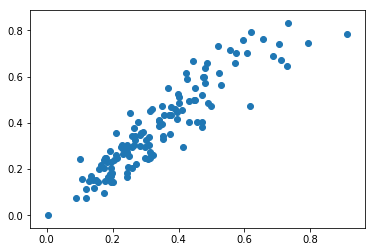

In [0]:
plt.scatter(X[:,0], X[:,1])

# The K mean clustering to find the centroid of the images 
k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-Means minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. Better Euclidean solutions can for example be found using k-medians and k-medoids. (Source - wikipedia.org)

![](images/kmean.jpg)

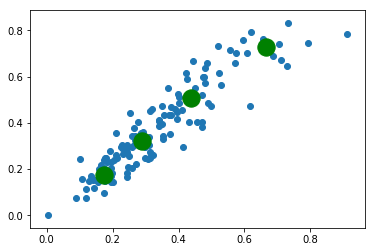

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='green')
plt.show()

# Display the centroid of the Anchor boxes based on the finding from the above algorithm 

In [0]:
kmeans.cluster_centers_

array([[0.437153, 0.507083],
       [0.172625, 0.176312],
       [0.290122, 0.323049],
       [0.664667, 0.728333]])

# Let's run it for another 100 images . This time we will not divide the images by 400 as all the images has been reshaped to the same size . Let's see how it works.

In [0]:

import os, json
with open("via_project_assgn16.json", 'r') as f:
    trn_j = json.load(f)


In [0]:
trn_bb = collections.defaultdict(lambda : [])
width= []
height = []
image_meta_dict = trn_j['_via_img_metadata']
for inner_dict_value in image_meta_dict.keys():
    inner_dict = image_meta_dict[inner_dict_value]
    img_name = inner_dict['filename']
    #print(img_name)
    for each_bb in inner_dict['regions']:
        bb_w= each_bb['shape_attributes']['width']
        bb_h = each_bb['shape_attributes']['height']
        width.append(bb_w)
        height.append(bb_h)

In [0]:
width_array = np.array(width)
heigth_array = np.array(height)

In [0]:
X = np.column_stack((width_array,heigth_array))

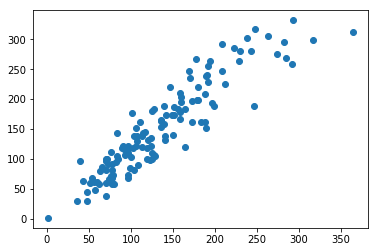

In [0]:
plt.scatter(X[:,0], X[:,1])

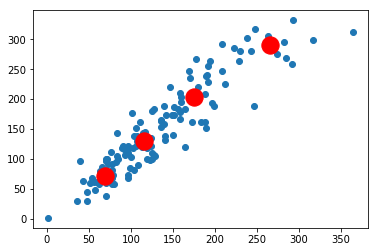

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [0]:
kmeans.cluster_centers_

array([[174.861111, 202.833333],
       [ 69.05    ,  70.525   ],
       [116.04878 , 129.219512],
       [265.866667, 291.333333]])

#Summary

The above assignments shows how to find the anchor boxes from a set of images . Also it's important to know that each image must be of the same size (second case), if not then we need to bring all the images to the same size (first case). We will use this data in our face detection assignment .
So stay tuned !

******* End ***********